In [1]:
import glob
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dataset import PolarisPublicationData

In [2]:
data = PolarisPublicationData()

In [3]:
MERFISH_im, MERFISH_results, seqFISH_im, seqFISH_results = data.load_data(figure='S8')

In [4]:
color_lookup = {
    'TNFAIP3': 'dodgerblue',
    'CCL4': 'magenta',
    'TNF': 'blue',
    'CXCL3': 'orangered',
    'NIBAN1': 'green',
    'ZC3H12A': 'darkorchid'
}

plot_genes = list(color_lookup.keys())
plot_df = seqFISH_results.loc[seqFISH_results.predicted_name.isin(plot_genes)]

ids = plot_df.predicted_name.values
colors = []
sizes = []
for item in ids:
    if item in list(color_lookup.keys()):
        colors.append(color_lookup[item])
        sizes.append(10)
    else:
        colors.append('yellow')
        sizes.append(5)

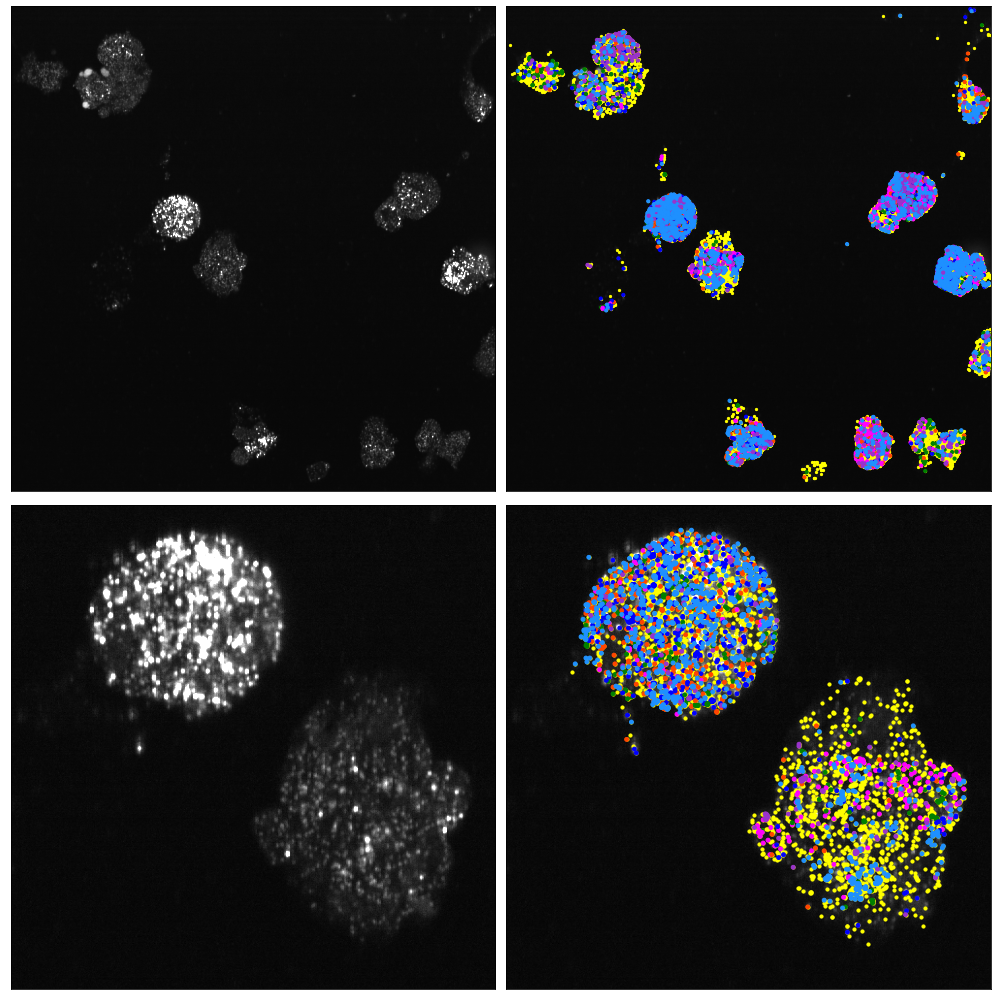

In [5]:
fig,ax = plt.subplots(2,2,figsize=(14,14))

for i in range(2):
    for ii in range(2):
        ax[i,ii].imshow(seqFISH_im, cmap='gray', vmax=3000)
        
        if ii==1:
            if i==0:
                ax[i,ii].scatter(seqFISH_results.y, seqFISH_results.x, s=5, c='yellow')
                ax[i,ii].scatter(plot_df.y, plot_df.x, s=10, c=colors)
                
            else:
                ax[i,ii].scatter(seqFISH_results.y, seqFISH_results.x, s=10, c='yellow')
                ax[i,ii].scatter(plot_df.y, plot_df.x, s=15, c=colors)
                
        ax[i,ii].set_xticks([])
        ax[i,ii].set_yticks([])

        ax[1,ii].set_xlim([500,1000])
        ax[1,ii].set_ylim([1250,750])
        
plt.tight_layout()
plt.show()

In [6]:
cell_types = {
    'endothelium': ['ACKR1', 'ADGRL4', 'ARHGDIB', 'CAVIN', 'CDH5', 'CLEC14A', 'EGFL7',
                    'ESAM', 'F8', 'FLT4', 'GJA4', 'GNAI2', 'GPIHBP1', 'MMRN2', 'NPDC1', 
                    'NRP1', 'PECAM1', 'PTPRB', 'RAMP3', 'SELE', 'SHANK3', 'SOX18',
                    'SPARCL', 'TCF4', 'TIE1', 'TM4SF1', 'TSPAN13', 'VWF', 'EHD3', 'EMCN',
                    'FLT1', 'KDR'],
    'proximal tube': ['ACE2', 'AK4', 'BBOX1', 'TMEM27', 'FMO1', 'GLYAT', 'GPX3', 'MAF',
                      'NAPSA', 'OIT3', 'PDZK1', 'PRLR', 'PTH1R', 'SLC2A2', 'SLC30A8',
                      'WDR72', 'PCK1', 'SLC9A3R2'], 
    #NAPSA, PCK1, and GP3 are highly expressed
    'fibroblast': ['AEBP1', 'CAV1', 'CCDC80', 'CPE', 'FBN1', 'GSN', 'HSD11B1', 'HTRA3',
                   'IGFBP6', 'MXRA8', 'PRELP', 'SCARA5', 'SERPING1', 'SFRP2'],
    'ascending LOH': ['CHGB', 'KCNJ1', 'KNG1'],
    'b cells': ['BANK1', 'BLK', 'CD19', 'CD22', 'CD79A', 'CD79B', 'FAIM3', 'MS4A1', 
                'PAX5', 'TNFRSF13B', 'TNFRSF13C'],
    't cells': ['IL7R', 'KLF2', 'CD3D', 'CD3G', 'LCK', 'CD247', 'CD3E', 'CD6', 'CD8A',
                'CD8B1', 'CXCR6', 'MAL', 'TRAT1', 'ZAP70'],
    'collecting duct': ['Arg2', 'DCDC2A', 'ADGRF5', 'MME', 'AQP2'],
    'macrophages': ['C1QA', 'C1QB', 'C1QC', 'CSF1R', 'CTSS', 'FOLR2', 'MARCO', 'STAB1',
                    'TLR7', 'VSIG4'],
    'podocyte': ['SYNPO', 'WT1', 'APLP1'],
    'distal tube': ['ATP1B1', 'DCN'] #ATP1B1 is highly expressed
}

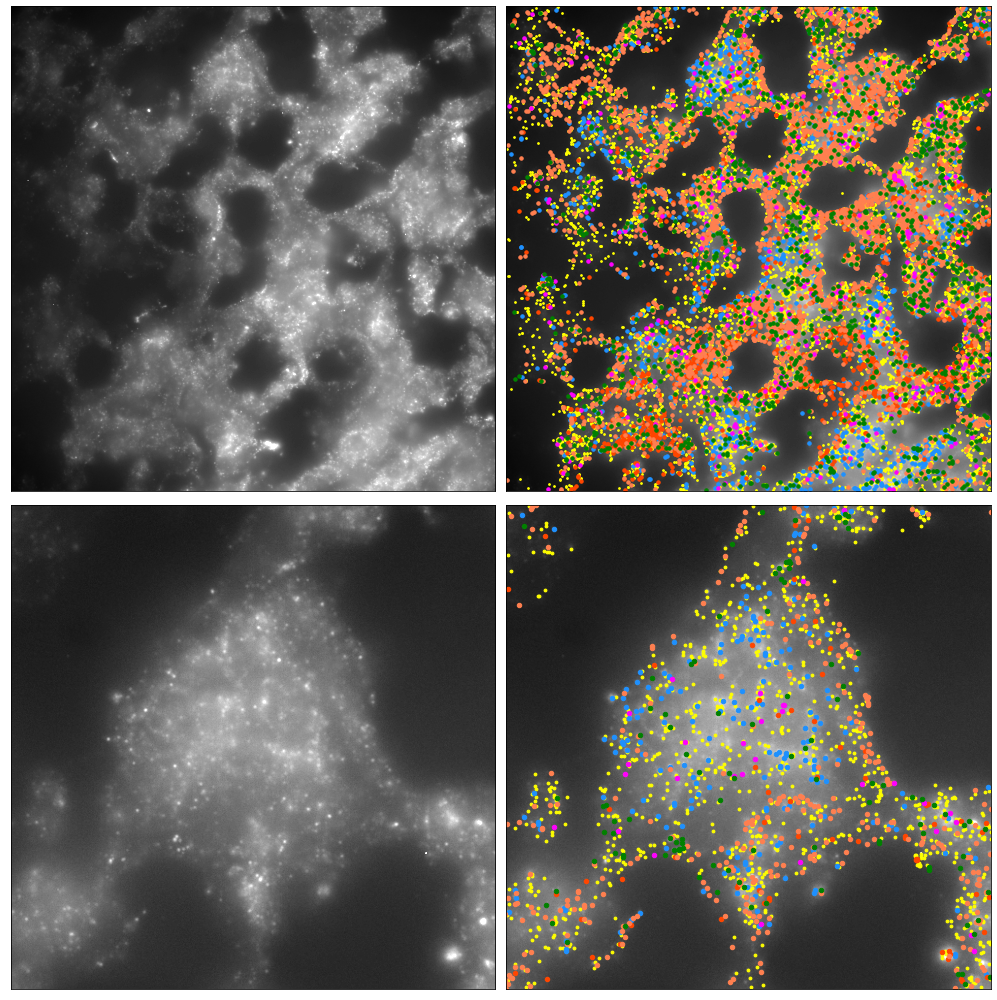

In [7]:
s1=3
s2=12
diff=8

fig,ax = plt.subplots(2,2,figsize=(14,14))

for i in range(2):
    for ii in range(2):
        ax[i,ii].imshow(MERFISH_im, cmap='gray', vmax=8000)
        
        ax[i,ii].set_xticks([])
        ax[i,ii].set_yticks([])

        ax[1,ii].set_xlim([550,1050])
        ax[1,ii].set_ylim([525,25])

ax[0,1].scatter(MERFISH_results.y, MERFISH_results.x, c='yellow', s=s1)
ax[1,1].scatter(MERFISH_results.y, MERFISH_results.x, c='yellow', s=s1+5)

plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='ATP1B1']
ax[0,1].scatter(plot_df.y, plot_df.x, c='dodgerblue', s=s2, label='distal')
ax[1,1].scatter(plot_df.y, plot_df.x, c='dodgerblue', s=s2+diff, label='distal')

plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='NAPSA']
ax[0,1].scatter(plot_df.y, plot_df.x, c='orangered', s=s2, label='proximal S3T2')
ax[1,1].scatter(plot_df.y, plot_df.x, c='orangered', s=s2+diff, label='proximal S3T2')
plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='PDZK1']
ax[0,1].scatter(plot_df.y, plot_df.x, c='orangered', s=s2)
ax[1,1].scatter(plot_df.y, plot_df.x, c='orangered', s=s2+diff)
plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='GPX3']
ax[0,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2, label='proximal')
ax[1,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2+diff, label='proximal')
plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='PCK1']
ax[0,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2)
ax[1,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2+diff)
plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='PRLR']
ax[0,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2)
ax[1,1].scatter(plot_df.y, plot_df.x, c='coral', s=s2+diff)

plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='ALOX5AP']
ax[0,1].scatter(plot_df.y, plot_df.x, c='magenta', s=s2, label='immune cells')
ax[1,1].scatter(plot_df.y, plot_df.x, c='magenta', s=s2+diff, label='immune cells')
plot_df = MERFISH_results.loc[MERFISH_results.predicted_name=='CTWS']
ax[0,1].scatter(plot_df.y, plot_df.x, c='magenta', s=s2, label='immune cells')
ax[1,1].scatter(plot_df.y, plot_df.x, c='magenta', s=s2+diff, label='immune cells')

plot_df = MERFISH_results.loc[MERFISH_results.predicted_name.isin(cell_types['endothelium'])]
ax[0,1].scatter(plot_df.y, plot_df.x, c='green', s=s2, label='endothelium')
ax[1,1].scatter(plot_df.y, plot_df.x, c='green', s=s2+diff, label='endothelium')

plt.tight_layout()
plt.show()